# Benchmarking VOC12 reduced datset with AutoGluon
# Using presets

In [ ]:
!python --version

Python 3.9.16


In [ ]:
!nvidia-smi

Thu Apr 13 13:12:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


# Connecting to google drive and directing to folders with valtrain and test sets

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


# Iinstalling CUDA

In [ ]:
!pip install --upgrade mxnet-cu112

Approximately 3 minutes to install

In [ ]:
!pip install autogluon==0.6.2

Restart runtime after installing ipykernel (~13 seconds)

In [ ]:
!pip install -U ipykernel

In [ ]:
import autogluon as ag

In [ ]:
from autogluon.vision import ObjectDetector

/usr/local/lib/python3.9/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.12.1+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '
2023-04-15 16:22:32.942059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 16:22:34.933653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Changing into directory where datasets are stored

In [4]:
%cd /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced

/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced


In [ ]:
import os

for file in os.getcwd():
  print(os.listdir())

In [6]:
#!sudo apt install tree
!tree -d

.
├── checkpoint
├── VOC12_test
│   └── VOC2012
│       ├── Annotations
│       ├── ImageSets
│       │   └── Main
│       └── JPEGImages
├── VOC12_trai
│   └── VOC2012
│       ├── Annotations
│       ├── ImageSets
│       │   └── Main
│       └── JPEGImages
├── VOC12_trainval
│   └── VOC12
│       ├── Annotations
│       └── JPEGImages
└── VOC12_validation
    └── VOC2012
        ├── Annotations
        ├── ImageSets
        │   └── Main
        └── JPEGImages

23 directories


In [ ]:
import os

images_count = 0
annotation_count = 0

images_dir = os.getcwd()+"/VOC12_trai/VOC2012/JPEGImages/"
annotation_dir = os.getcwd()+"/VOC12_trai/VOC2012/Annotations/"

for path in os.listdir(images_dir):
  if os.path.isfile(os.path.join(images_dir,path)):
    images_count+=1

for path in os.listdir(annotation_dir):
  if os.path.isfile(os.path.join(annotation_dir,path)):
    annotation_count+=1

print("Images count:", images_count)
print("Annotation count:", annotation_count)

Images count: 2758
Annotation count: 2758


### Trying to check the "trainval.txt" file and see if it has corresponding annotations (.xml) and images (.jpg) for each line listed.

In [ ]:
def check_if_existsJPG(file_path, string):
    # check if the file exists in the given folder path
    return os.path.exists(os.path.join(file_path, string + ".jpg"))

def check_if_existsXML(file_path, string):
  return os.path.exists(os.path.join(file_path, string + ".xml"))

def read_strings_from_file(file_name):
    # read strings from a file, where each string is separated by a new line
    with open(file_name, "r") as file:
        strings = file.read().splitlines()
    return strings

def jpgCheck(strings_file, folder_path):
    # read strings from the given file
    strings = read_strings_from_file(strings_file)
    exists = 0
    nonexists = 0

    # check if the corresponding file with .jpg extension exists in the folder
    for string in strings:
        if check_if_existsJPG(folder_path, string):
            #print(f"{string}.jpg exists in {folder_path}")
            exists = exists + 1 
        else:
            #print(f"{string}.jpg does not exist in {folder_path}")
            nonexists = nonexists + 1

    return exists, nonexists

def xmlCheck(strings_file, folder_path):
    # read strings from the given file
    strings = read_strings_from_file(strings_file)
    exists = 0
    nonexists = 0

    # check if the corresponding file with .jpg extension exists in the folder
    for string in strings:
        if check_if_existsXML(folder_path, string):
            #print(f"{string}.jpg exists in {folder_path}")
            exists = exists + 1 
        else:
            #print(f"{string}.xml does not exist in {folder_path}")
            nonexists = nonexists + 1

    return exists, nonexists

In [ ]:
numExist = jpgCheck(os.getcwd()+'/VOC2012/ImageSets/Main/train.txt', os.getcwd()+'/VOC2012/JPEGImages')
print(numExist)

(2758, 0)


In [ ]:
xmlExist = xmlCheck(os.getcwd()+'/VOC2012/ImageSets/Main/train.txt', os.getcwd()+'/VOC2012/Annotations')
print(xmlExist)

(2758, 0)


In [ ]:
%cd /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/

/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced


In [ ]:
import os
print(os.getcwd())

/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced


### Main chunk of code for training. Below we are importing the dataset and running it. Will take some time.

In a future release ObjectDetector may be entirely reworked to use Torch as a backend.
This future change will likely be API breaking.Users should ensure they update their code that depends on ObjectDetector when upgrading to future AutoGluon releases.
For more information, refer to ObjectDetector refactor GitHub issue: https://github.com/autogluon/autogluon/issues/1559

Presets specified: ['good_quality_fast_inference']
Starting HPO experiments


  0%|          | 0/512 [00:00<?, ?it/s]

INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.lr        0.001 != 0.0001
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.seed      233 != 279
INFO:SSDEstimator:root.train.batch_size 16 != 8
INFO:SSDEstimator:root.valid.batch_size 16 != 8
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:}
INFO:SSDEstimator:Saved config to /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/678b3d17/.trial_0/config.yaml
[13:47:10] ..


 95%|█████████▌| 172407/181188 [00:02<00:00, 70755.59KB/s]
181189KB [00:02, 67717.12KB/s]                            
INFO:SSDEstimator:Start training from [Epoch 0]
[13:48:00] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
INFO:SSDEstimator:[Epoch 0][Batch 99], Speed: 0.153307 samples/sec, CrossEntropy=2.209421, SmoothL1=0.381164
INFO:SSDEstimator:[Epoch 0][Batch 199], Speed: 0.522397 samples/sec, CrossEntropy=2.054653, SmoothL1=0.368392
INFO:SSDEstimator:[Epoch 0][Batch 299], Speed: 0.519418 samples/sec, CrossEntropy=2.027681, SmoothL1=0.381897
INFO:SSDEstimator:[Epoch 0] Training cost: 89.798082, CrossEntropy=2.028692, SmoothL1=0.392388
[13:49:17] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment va


100%|██████████| 57421/57421 [00:00<00:00, 64912.09KB/s]
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.lr        0.001 != 0.0015335192657991565
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.seed      233 != 279
INFO:SSDEstimator:root.train.batch_size 16 != 8
INFO:SSDEstimator:root.valid.batch_size 16 != 8
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:}
INFO:SSDEstimator:Saved config to /content/MyDrive/MyDrive/Colab Notebooks/be


100%|██████████| 224190/224190 [00:04<00:00, 55923.93KB/s]
INFO:YOLOv3Estimator:Start training from [Epoch 0]
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.lr        0.001 != 0.0019578897201213
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.seed      233 != 279
INFO:SSDEstimator:root.train.batch_size 16 != 64
INFO:SSDEstimator:root.valid.batch_size 16 != 64
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:}
INFO:SSDEstimator:Saved c


 94%|█████████▎| 103206/110292 [00:03<00:00, 26893.13KB/s]
110293KB [00:04, 26756.02KB/s]                            
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.num_workers     4 != 12
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_patience -1 != 20
INFO:SSDEstimator:root.train.lr        0.001 != 0.001142325415560837
INFO:SSDEstimator:root.train.epochs    20 != 50
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.train.seed      233 != 279
INFO:SSDEstimator:root.train.batch_size 16 != 64
INFO:SSDEstimator:root.valid.batch_size 16 != 64
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != resnet50_v1
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:SSDEstimator:}
INFO:SSDEstimat

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:YOLOv3Estimator:modified configs(<old> != <new>): {
INFO:YOLOv3Estimator:root.dataset         voc_tiny != auto
INFO:YOLOv3Estimator:root.num_workers     4 != 12
INFO:YOLOv3Estimator:root.train.lr        0.001 != 0.007098936257405899
INFO:YOLOv3Estimator:root.train.seed      233 != 279
INFO:YOLOv3Estimator:root.train.epochs    20 != 50
INFO:YOLOv3Estimator:root.train.early_stop_max_value 1.0 != inf
INFO:YOLOv3Estimator:root.train.early_stop_patience -1 != 20
INFO:YOLOv3Estimator:root.train.early_stop_baseline 0.0 != -inf
INFO:YOLOv3Estimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:YOLOv3Estimator:root.gpus            (0, 1, 2, 3) != (0,)
INFO:YOLOv3Estimator:}
INFO:YOLOv3Estimator:Saved config to /content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/678b3d17/.trial_7/config.yaml
INFO:YOLOv3Estimator:Using transfer learning from yolo3_darknet53_coco, the other network parameters are ignored.
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:S

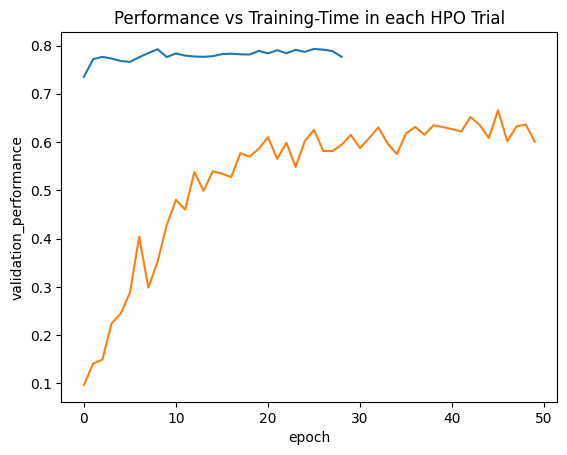

Finished, total runtime is 3041.26 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 12,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0

In [ ]:
dataset_train = ObjectDetector.Dataset.from_voc(root='VOC12_trai/VOC2012', splits='train')
dataset_val = ObjectDetector.Dataset.from_voc(root='VOC12_validation/VOC2012', splits='validation')

detector = ObjectDetector()

import traceback
try:
    detector.fit(train_data=dataset_train, tuning_data=dataset_val, presets='good_quality_fast_inference', ngpus_per_trial=1)
except Exception as e:
    traceback.print_exc()

#Saving model
savefile = 'detector.ag'
detector.save(savefile)


# Below I'm loading the model and seeing the score against the test dataset

In [ ]:
savefile1 = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/voc12_detector.ag'
#detector.save(savefile1)
new_detector = ObjectDetector.load(savefile1)

dataset_test = ObjectDetector.Dataset.from_voc(root='VOC12_test/VOC2012', splits='test')

test_map = new_detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][-1]))

[16:32:06] ../src/base.cc:79: cuDNN lib mismatch: linked-against version 8700 != compiled-against version 8101.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.


100%|██████████| 57421/57421 [00:02<00:00, 24140.27KB/s]
/usr/local/lib/python3.9/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]
[16:37:59] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)
[16:38:33] ../src/operator/nn/./cudnn/./cudnn_algoreg-inl.h:96: Running performance tests to find the best convolution algorithm, this can take a while... (set the environment variable MXNET_CUDNN_AUTOTUNE_DEFAULT to 0 to disable)


mAP on test dataset: 0.09274164565461535


In [ ]:
test_map = new_detector.evaluate(dataset_test, score_thresh=0.90)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ ❱ 1 test_map = new_detector.evaluate(dataset_test, score_thresh=0.90)                            │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: evaluate() got an unexpected keyword argument 'score_thresh'

In [ ]:
print("mAP on test dataset: {}".format(test_map[1][-1]))

mAP on test dataset: 0.09274164565461535


In [ ]:
print(test_map)

(['cat', 'bird', 'dog', 'sheep', 'bus', 'cow', 'aeroplane', 'train', 'horse', 'person', 'boat', 'motorbike', 'mAP'], [0.0032371189641219314, 0.0008340283569641369, 0.000251130085384229, 0.053158705701078585, 0.0022172949002217295, 0.0, 0.03441355999261969, 0.00089126559714795, 0.004958677685950413, 0.016890535741855797, 0.0, 0.9960474308300398, 0.09274164565461535])


In [ ]:
class_names = ['cat', 'bird', 'dog', 'sheep', 'bus', 'cow', 'aeroplane', 'train', 'horse', 'person', 'boat', 'motorbike', 'mAP']
aps = [0.0032371189641219314, 0.0008340283569641369, 0.000251130085384229, 0.053158705701078585, 0.0022172949002217295, 0.0, 0.03441355999261969, 0.00089126559714795, 0.004958677685950413, 0.016890535741855797, 0.0, 0.9960474308300398, 0.09274164565461535]

# Combine the class names and APs using the zip function
results = zip(class_names, aps)

# Format the output using f-strings
print("Class\t\tAP")
print("----\t\t--")
for class_name, ap in results:
    print(f"{class_name}\t\t{ap:.4f}")

Class		AP
----		--
cat		0.0032
bird		0.0008
dog		0.0003
sheep		0.0532
bus		0.0022
cow		0.0000
aeroplane		0.0344
train		0.0009
horse		0.0050
person		0.0169
boat		0.0000
motorbike		0.9960
mAP		0.0927


In [ ]:
print("mAP on validation dataset: {}".format(validation_map[1][-1]))

mAP on validation dataset: 0.1747046287185238


In [ ]:
print(fit_summary1)

{'train_map': 0.811824843833854, 'valid_map': 0.6661027365392994, 'total_time': 3040.539931535721, 'best_config': {'ssd': {'base_network': 'resnet50_v1', 'data_shape': 512, 'filters': None, 'sizes': (30, 60, 111, 162, 213, 264, 315), 'ratios': ([1, 2, 0.5], [1, 2, 0.5, 3, 0.3333333333333333], [1, 2, 0.5, 3, 0.3333333333333333], [1, 2, 0.5, 3, 0.3333333333333333], [1, 2, 0.5], [1, 2, 0.5]), 'steps': (8, 16, 32, 64, 100, 300), 'syncbn': False, 'amp': False, 'transfer': 'ssd_512_resnet50_v1_coco', 'nms_thresh': 0.45, 'nms_topk': 400}, 'train': {'batch_size': 8, 'start_epoch': 0, 'epochs': 50, 'lr': 0.0001, 'lr_decay': 0.1, 'lr_decay_epoch': (160, 200), 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'seed': 279, 'dali': False, 'early_stop_patience': 20, 'early_stop_min_delta': 0.001, 'early_stop_baseline': -inf, 'early_stop_max_value': inf}, 'valid': {'batch_size': 8, 'val_interval': 1, 'metric': 'voc07', 'iou_thresh': 0.5}, 'dataset': 'auto', 'dataset_root': 'auto', 'gpus': [0], 'res

In [ ]:
image = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/VOC12_test/VOC2012/JPEGImages/005791.jpg'

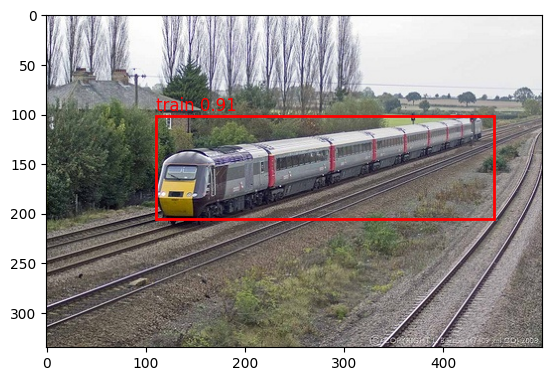

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/VOC12_test/VOC2012/JPEGImages/002949.jpg'
image = np.array(Image.open(image_path))

# Load the prediction results
result = new_detector.predict(image)

# Create a figure and axes object
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Loop through the rows of the prediction results
for i, row in result[result['predict_score'] > 0.9].iterrows():
#for i, row in result.iterrows():
    # Get the class label, confidence score, and bounding box coordinates
    label = row['predict_class']
    score = row['predict_score']
    bbox = row['predict_rois']
    
    # Convert the normalized bounding box coordinates to pixel values
    x1 = int(bbox['xmin'] * image.shape[1])
    y1 = int(bbox['ymin'] * image.shape[0])
    x2 = int(bbox['xmax'] * image.shape[1])
    y2 = int(bbox['ymax'] * image.shape[0])
    
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the axes object
    ax.add_patch(rect)
    
    # Add a label to the bounding box with the class label and confidence score
    ax.text(x1, y1-5, f"{label} {score:.2f}", fontsize=12, color='r')

# Show the plot
plt.show()



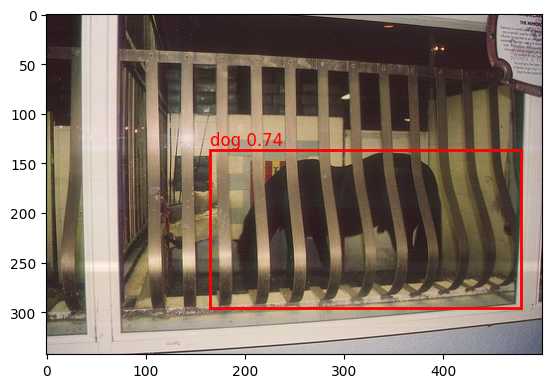

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/MyDrive/MyDrive/Colab Notebooks/benchmark_project/VOC12_reduced/VOC12_test/VOC2012/JPEGImages/002008.jpg'
image = np.array(Image.open(image_path))

# Load the prediction results
result = new_detector.predict(image)

# Create a figure and axes object
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Loop through the rows of the prediction results
for i, row in result[result['predict_score'] > 0.5].iterrows():
#for i, row in result.iterrows():
    # Get the class label, confidence score, and bounding box coordinates
    label = row['predict_class']
    score = row['predict_score']
    bbox = row['predict_rois']
    
    # Convert the normalized bounding box coordinates to pixel values
    x1 = int(bbox['xmin'] * image.shape[1])
    y1 = int(bbox['ymin'] * image.shape[0])
    x2 = int(bbox['xmax'] * image.shape[1])
    y2 = int(bbox['ymax'] * image.shape[0])
    
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the axes object
    ax.add_patch(rect)
    
    # Add a label to the bounding box with the class label and confidence score
    ax.text(x1, y1-5, f"{label} {score:.2f}", fontsize=12, color='r')

# Show the plot
plt.show()


In [ ]:
result

In [ ]:
dataset_test

,image,rois,image_attr
0,VOC12_test/VOC2012/JPEGImages/000006.jpg,"[{'class': 'aeroplane', 'xmin': 0.206, 'ymin':...","{'width': 500.0, 'height': 333.0}"
1,VOC12_test/VOC2012/JPEGImages/000012.jpg,"[{'class': 'cat', 'xmin': 0.0, 'ymin': 0.09226...","{'width': 448.0, 'height': 336.0}"
2,VOC12_test/VOC2012/JPEGImages/000017-2.jpg,"[{'class': 'cat', 'xmin': 0.0, 'ymin': 0.0, 'x...","{'width': 500.0, 'height': 375.0}"
3,VOC12_test/VOC2012/JPEGImages/000019-2.jpg,"[{'class': 'cat', 'xmin': 0.0, 'ymin': 0.004, ...","{'width': 493.0, 'height': 500.0}"
4,VOC12_test/VOC2012/JPEGImages/000019.jpg,"[{'class': 'bird', 'xmin': 0.6666666666666666,...","{'width': 375.0, 'height': 500.0}"
...,...,...,...
601,VOC12_test/VOC2012/JPEGImages/005719.jpg,"[{'class': 'motorbike', 'xmin': 0.146, 'ymin':...","{'width': 500.0, 'height': 319.0}"
602,VOC12_test/VOC2012/JPEGImages/005733.jpg,"[{'class': 'cow', 'xmin': 0.0, 'ymin': 0.11428...","{'width': 500.0, 'height': 315.0}"
603,VOC12_test/VOC2012/JPEGImages/005749.jpg,"[{'class': 'boat', 'xmin': 0.204, 'ymin': 0.29...","{'width': 500.0, 'height': 375.0}"
604,VOC12_test/VOC2012/JPEGImages/005791.jpg,"[{'class': 'bird', 'xmin': 0.208, 'ymin': 0.49...","{'width': 500.0, 'height': 375.0}"


In [ ]:
bulk_result = new_detector.predict(dataset_test)

In [ ]:
!ls

checkpoint   voc12_detector.ag	VOC12_trai
detector.ag  VOC12_test		VOC12_validation


In [ ]:
bulk_result.to_csv('bulk_results.csv', index=False)

In [ ]:
dataset_test.to_csv('dataset_test.csv', index=False)